In [39]:
#Dataset
import pandas

from ucimlrepo import fetch_ucirepo 
# fetch dataset 
drug_consumption_quantified = fetch_ucirepo(id=373) 
# data (as pandas dataframes) 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets



y = y.replace("CL0", 0) 
y = y.replace("CL1", 0) 
y = y.replace("CL2", 1) 
y = y.replace("CL3", 1) 
y = y.replace("CL4", 1) 
y = y.replace("CL5", 1) 
y = y.replace("CL6", 1)




C:\Users\ruben\AppData\Local\Temp\ipykernel_15372\1666405905.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace("CL4", 1)
C:\Users\ruben\AppData\Local\Temp\ipykernel_15372\1666405905.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace("CL6", 1)


In [40]:
X.columns

Index(['age', 'gender', 'education', 'country', 'ethnicity', 'nscore',
       'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss'],
      dtype='object')

In [22]:
y.columns

Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc',
       'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'],
      dtype='object')

In [41]:
y

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
1881,1,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0
1882,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,0
1883,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0


In [47]:
from sklearn.cluster import KMeans

# Configurar el modelo K-Means
kmeans = KMeans(n_clusters=2, random_state=0)  # Puedes ajustar el número de clusters
kmeans.fit(X)

# Etiquetas de los clusters resultantes
clusters = kmeans.labels_

In [48]:
from sklearn.cluster import AgglomerativeClustering

# Configurar el modelo jerárquico
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical.fit(X)

# Etiquetas de los clusters resultantes
h_clusters = hierarchical.labels_


Drug_Use        0    1
Cluster_KMeans        
0               2  953
1               1  929
Drug_Use              0    1
Cluster_Hierarchical        
0                     1  903
1                     2  979


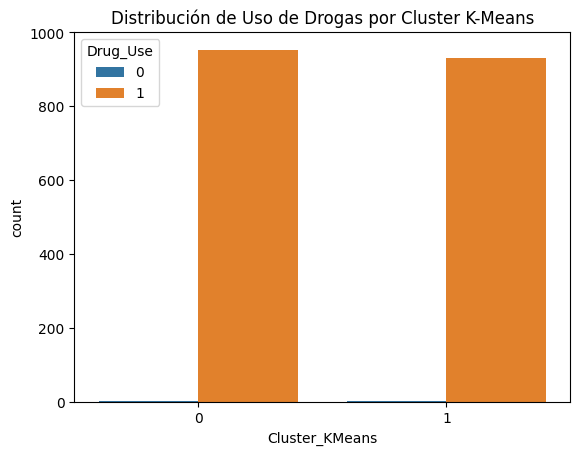

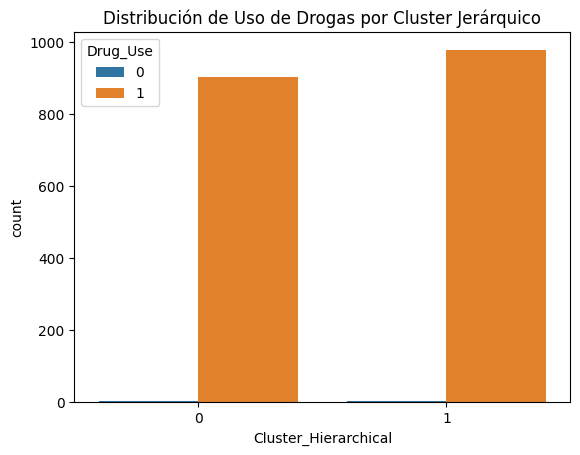

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que todas las drogas están marcadas como 0 o 1 en las columnas
y_drug_use = (y.sum(axis=1) > 0).astype(int)

# Crear DataFrame para análisis
df_analysis = pd.DataFrame({
    'Cluster_KMeans': clusters,
    'Cluster_Hierarchical': h_clusters,
    'Drug_Use': y_drug_use
})

# Tabulación cruzada para K-Means
ct_kmeans = pd.crosstab(df_analysis['Cluster_KMeans'], df_analysis['Drug_Use'])
print(ct_kmeans)

# Tabulación cruzada para Hierarchical
ct_hierarchical = pd.crosstab(df_analysis['Cluster_Hierarchical'], df_analysis['Drug_Use'])
print(ct_hierarchical)

# Diagramas de barras para K-Means
sns.countplot(x='Cluster_KMeans', hue='Drug_Use', data=df_analysis)
plt.title('Distribución de Uso de Drogas por Cluster K-Means')
plt.show()

# Diagramas de barras para Hierarchical
sns.countplot(x='Cluster_Hierarchical', hue='Drug_Use', data=df_analysis)
plt.title('Distribución de Uso de Drogas por Cluster Jerárquico')
plt.show()


In [37]:
# Contar las personas que usan al menos una droga
number_of_users = (y_drug_use > 0).sum()

print(f"Número de personas que consumen al menos una droga: {number_of_users}")

Número de personas que consumen al menos una droga: 1882


In [53]:
columns = ['alcohol', 'caff', 'choc', 'nicotine']  # Ajusta los nombres según tu DataFrame

number_of_users = (y[columns] == 0).any(axis=1).sum()

print(f"Número de personas que consumen drogas legales: {number_of_users}")

Número de personas que consumen drogas legales: 671
